to create numerical time series data, I recorded values from my computer

# load data

In [1]:
import pandas
import pickle
import pytz
import matplotlib.pyplot as plt
import time
import datetime

In [2]:
with open("host_streaming_stats/list_of_df_other_notebooks_1553432207.5549905.pkl",'rb') as handl:
    lst_of_df = pickle.load(handl)

In [5]:
type(lst_of_df)

list

In [3]:
len(lst_of_df)

4

In [6]:
type(lst_of_df[0])

dict

In [4]:
lst_of_df[0].keys()

dict_keys(['id', 'path', 'name', 'type', 'kernel', 'notebook', 'pid', 'df'])

In [7]:
df = lst_of_df[0]['df']

In [8]:
df.shape

(600, 328)

In [10]:
df.columns

Index(['CPU 1 times guest', 'CPU 1 times guest_nice', 'CPU 1 times idle',
       'CPU 1 times iowait', 'CPU 1 times irq', 'CPU 1 times nice',
       'CPU 1 times softirq', 'CPU 1 times steal', 'CPU 1 times system',
       'CPU 1 times user',
       ...
       'system virtual memory buffers', 'system virtual memory cached',
       'system virtual memory free', 'system virtual memory inactive',
       'system virtual memory percent', 'system virtual memory shared',
       'system virtual memory slab', 'system virtual memory total',
       'system virtual memory used', 'time in unix seconds'],
      dtype='object', length=328)

In [9]:
df.head()

,CPU 1 times guest,CPU 1 times guest_nice,CPU 1 times idle,CPU 1 times iowait,CPU 1 times irq,CPU 1 times nice,CPU 1 times softirq,CPU 1 times steal,CPU 1 times system,CPU 1 times user,...,system virtual memory buffers,system virtual memory cached,system virtual memory free,system virtual memory inactive,system virtual memory percent,system virtual memory shared,system virtual memory slab,system virtual memory total,system virtual memory used,time in unix seconds
0,0.0,0.0,62.8,0.6,0.0,0.0,0.0,0.0,12.8,23.8,...,17334272,150708224,1696976896,129146880,18.0,4096,44695552,2096164864,231145472,1.553432e+09
1,0.0,0.0,97.1,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,17346560,150716416,1696976896,129155072,18.0,4096,44732416,2096164864,231124992,1.553432e+09
2,0.0,0.0,94.3,0.0,0.0,0.0,0.0,0.0,0.9,4.7,...,17346560,150716416,1696976896,129155072,18.0,4096,44732416,2096164864,231124992,1.553432e+09
3,0.0,0.0,96.1,0.0,0.0,0.0,0.0,0.0,1.0,2.9,...,17346560,150712320,1697017856,129155072,18.0,4096,44658688,2096164864,231088128,1.553432e+09
4,0.0,0.0,96.2,0.0,0.0,0.0,0.0,0.0,1.0,2.9,...,17346560,150708224,1696890880,129155072,18.0,4096,44654592,2096164864,231219200,1.553432e+09


# plot a single column, explore the x-axis label

## by default, Pandas uses a line plot

Text(0.5,0,'time, but integer indices...')

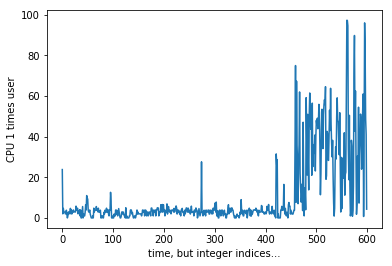

In [11]:
plt.plot(df['CPU 1 times user']);
plt.ylabel('CPU 1 times user')
plt.xlabel('time, but integer indices...')

## plot a single column as a scatter plot

unlike a line plot, scatter requires two inputs. Here we'll use the index of the series as the x axis

In [12]:
df['CPU 1 times user'].head()

0    23.8
1     2.0
2     4.7
3     2.9
4     2.9
Name: CPU 1 times user, dtype: float64

Text(0,0.5,'CPU 1 user time')

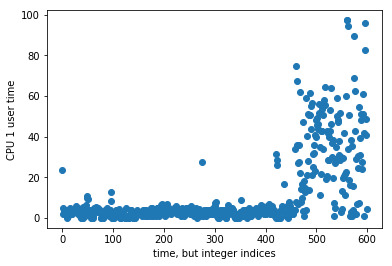

In [13]:
plt.scatter(x=df['CPU 1 times user'].index,y=df['CPU 1 times user'].values);
plt.xlabel('time, but integer indices')
plt.ylabel('CPU 1 user time')

do any of the columns have the word "seconds" present?

In [14]:
for this_col in list(df.columns):
    if ('seconds') in this_col:
        print(this_col)

time in unix seconds


In [15]:
df['time in unix seconds'].head()

0    1.553432e+09
1    1.553432e+09
2    1.553432e+09
3    1.553432e+09
4    1.553432e+09
Name: time in unix seconds, dtype: float64

That's number of seconds since Unix Epoch - https://en.wikipedia.org/wiki/Unix_time

We can get the current number of seconds using time:

In [16]:
time.time()

1584894334.8370929

Rather than use the index as the x-axis label, let's try the unix time stamp

Text(0.5,0,'epoch seconds')

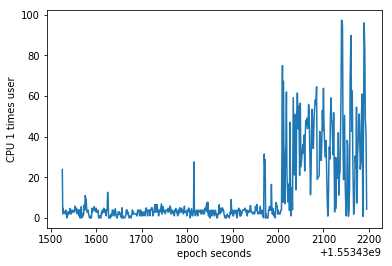

In [17]:
plt.plot(df['time in unix seconds'],df['CPU 1 times user']);
plt.ylabel('CPU 1 times user')
plt.xlabel('epoch seconds')

The timestamp is not much more helpful than the integer index, and perhaps more confusing. 

We can convert the float to a datetime object:<BR>
https://stackoverflow.com/questions/3682748/converting-unix-timestamp-string-to-readable-date

In [19]:
df['time in unix seconds'][0]

1553431525.2157638

In [18]:
datetime.datetime.utcfromtimestamp(df['time in unix seconds'][0])

datetime.datetime(2019, 3, 24, 12, 45, 25, 215764)

Apply that same transformation to each element in the column using an unnamed function (hence the lambda keyword)

In [20]:
df['datetime'] = df['time in unix seconds'].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x))
df['datetime'].head()

0   2019-03-24 12:45:25.215764
1   2019-03-24 12:45:26.248713
2   2019-03-24 12:45:27.315256
3   2019-03-24 12:45:28.361020
4   2019-03-24 12:45:29.405532
Name: datetime, dtype: datetime64[ns]

<BR>
Now the dataframe has two equivalent columns with different types - a float and a datetime

In [21]:
for this_col in list(df.columns):
    if ('date' in this_col) or ('second' in this_col):
        print(this_col)

datetime
time in unix seconds


<BR>
Let's view these two columns side-by-side

In [22]:
df[['datetime','time in unix seconds']].head()

,datetime,time in unix seconds
0,2019-03-24 12:45:25.215764,1.553432e+09
1,2019-03-24 12:45:26.248713,1.553432e+09
2,2019-03-24 12:45:27.315256,1.553432e+09
3,2019-03-24 12:45:28.361020,1.553432e+09
4,2019-03-24 12:45:29.405532,1.553432e+09


Revisit our previous visualization, but using the datetime object for the x-axis

Text(0.5,0,'date and time')

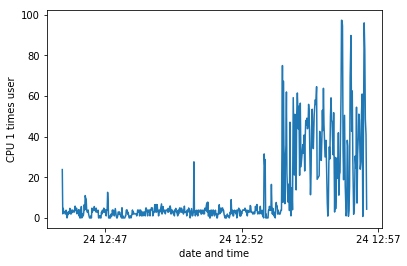

In [23]:
plt.plot(df['datetime'],df['CPU 1 times user']);
plt.ylabel('CPU 1 times user')
plt.xlabel('date and time')

Matlab does some cleanup of the x-axis labels, but the labels overlap. 

One approach to address this is rotating the labels

Text(0.5,0,'date and time')

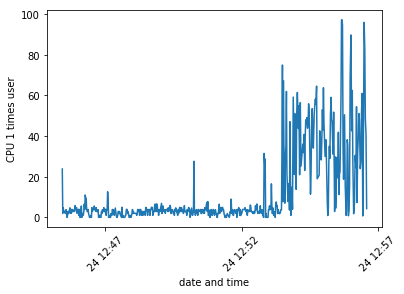

In [24]:
plt.plot(df['datetime'],df['CPU 1 times user']);
plt.xticks(rotation=45); # in degrees
plt.ylabel('CPU 1 times user')
plt.xlabel('date and time')

That's more readable

# Switch index from integer to timestamp

Since we'll need to refer to the datetime for every column, converting the dataframe index from integers to datetime objects is useful

By default, the index is a range of integers

In [25]:
df.index

RangeIndex(start=0, stop=600, step=1)

To see the values of the dataframe index, convert the .index to a list

In [26]:
list(df.index)[0:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

we can set the index to be the values in the 'datetime' column<BR>
https://stackoverflow.com/questions/42941310/creating-pandas-dataframe-with-datetime-index-and-random-values-in-column

In [27]:
df = df.set_index('datetime')

In [28]:
df.head()

,CPU 1 times guest,CPU 1 times guest_nice,CPU 1 times idle,CPU 1 times iowait,CPU 1 times irq,CPU 1 times nice,CPU 1 times softirq,CPU 1 times steal,CPU 1 times system,CPU 1 times user,...,system virtual memory buffers,system virtual memory cached,system virtual memory free,system virtual memory inactive,system virtual memory percent,system virtual memory shared,system virtual memory slab,system virtual memory total,system virtual memory used,time in unix seconds
datetime,,,,,,,,,,,,,,,,,,,,,
2019-03-24 12:45:25.215764,0.0,0.0,62.8,0.6,0.0,0.0,0.0,0.0,12.8,23.8,...,17334272,150708224,1696976896,129146880,18.0,4096,44695552,2096164864,231145472,1.553432e+09
2019-03-24 12:45:26.248713,0.0,0.0,97.1,0.0,0.0,0.0,0.0,0.0,1.0,2.0,...,17346560,150716416,1696976896,129155072,18.0,4096,44732416,2096164864,231124992,1.553432e+09
2019-03-24 12:45:27.315256,0.0,0.0,94.3,0.0,0.0,0.0,0.0,0.0,0.9,4.7,...,17346560,150716416,1696976896,129155072,18.0,4096,44732416,2096164864,231124992,1.553432e+09
2019-03-24 12:45:28.361020,0.0,0.0,96.1,0.0,0.0,0.0,0.0,0.0,1.0,2.9,...,17346560,150712320,1697017856,129155072,18.0,4096,44658688,2096164864,231088128,1.553432e+09
2019-03-24 12:45:29.405532,0.0,0.0,96.2,0.0,0.0,0.0,0.0,0.0,1.0,2.9,...,17346560,150708224,1696890880,129155072,18.0,4096,44654592,2096164864,231219200,1.553432e+09


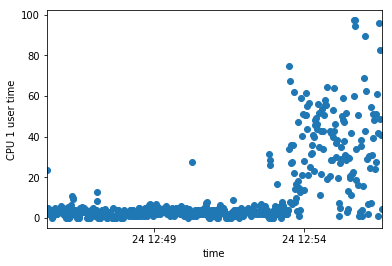

In [33]:
plt.scatter(x=df['CPU 1 times user'].index,y=df['CPU 1 times user'].values);
plt.xlabel('time')
plt.ylabel('CPU 1 user time')
_=plt.xlim(min(df['CPU 1 times user'].index),
         max(df['CPU 1 times user'].index))